# Aprendizaje No Supervisado
### Aprendizaje Automático - Instituto de Computación - UdelaR

### Aprendizaje No Supervisado

El aprendizaje no supervisado es una de las "familias" de métodos de aprendizaje automático. A diferencia del aprendizaje supervisado, donde conocemos la clase de cada instancia en el dataset, en el aprendizaje no supervisado trabajamos directamente con las instancias sin anotar, buscando patrones  y relaciones dentro del conjunto. 

En este curso veremos dos tipos de estas técnicas: clustering y análisis de componentes principales (existen otras, como deteccción de anomalías, o autoencoders, que buscan aprender representaciones de los datos, que no cubriremos).

# Parte A: Clustering

### Clustering

- Buscamos agrupar las instancias del conjunto de entrenamiento
- Queremos que las instancias que están en el mismo cluster sean parecidas entre sí, y diferentes a los de los demás clusters.
- Podemos tambier verlo como un proceso de clasificar... con etiquetas desconocidas.
- El objetivo del clustering no es predictivo, sino descriptivo. 

<img src="https://github.com/pln-fing-udelar/curso_aa/blob/master/img/clusters.png?raw=true" alt="Diferentes clusters"  width=500 />
<div align=right>(Ejemplo tomado del libro "Introduction to Data Mining")</div>

### Definición de Cluster

Un _cluster_ es un conjunto de subconjuntos $ C = C_1,\ldots,C_k$ de un conjunto de instancias $D$ tales que 


$S= \bigcup_{i=1}^k C_i$ y $C_j \bigcap C_i = \emptyset$ para $i \neq j$

- Cada instancia pertenece a un (y solo un) cluster. 

### Distancias

- Dado que que queremos agrupar instancias similares, necesitamos una noción de _distancia_. La distancia más utilizada para valores numéricos es la distancia euclidiana. Si tenemos dos instancias $x,y \in \mathbb{R}^{n}$:

$$ d(x,y) = \sqrt{\sum_{i=1}^{n} (x_i - y_i)^2} $$

- La distancia puede definirse a partir de de la norma euclídea del vector desplazamiento

$$ d(x,y) = \| x - y \| $$

donde $\| x  \|= \sqrt{x \cdot x}$


- Si no nos interesa tener en cuenta la magnitud de los vectores, podemos utilizar la distancia coseno (que mide el coseno del ángulo entre los vectores):

$$ \frac{x \cdot y}{\| x \| \| y\|} $$

- Existen (muchas) otras distancias posibles.



### K-means

- Es el algoritmo más utilizado para clustering, porque es muy eficiente
- Asume que nuestras instancias pertenecen a $\mathbb{R}^n$
- Es un algoritmo de partición: parte el espacio en K clusters convexos
- Cada cluster está representado por un _centroide_ (definido como la media de las instancias)
- Se busca minimizar la distancia euclídea entre los puntos de cada cluster y su centroide



### K-means

Ejemplo (tomado de la Entrega de la Tarea 4, grupo 5, año 2019):
  
<img src="https://github.com/pln-fing-udelar/curso_aa/blob/master/img/clusters_partidos_23.png?raw=true" alt="Diferentes clusters"  width=400 />



### K-means

Ejemplo (tomado de la Entrega de la Tarea 4, grupo 5, año 2019, sobre el corpus aquienvoto.uy):
 

 
<img src="https://github.com/pln-fing-udelar/curso_aa/blob/master/img/cluster_partidos_5_50.png?raw=true" alt="Diferentes clusters"  width=400 />


### K-means

Ejemplo (tomado de la Entrega de la Tarea 4, grupo 5, año 2019):


<img src="https://github.com/pln-fing-udelar/curso_aa/blob/master/img/clusters_partidos_11.png?raw=true" alt="Diferentes clusters"  width=500 />

### K-means

- El centroide de un cluster se define como la media de las instancias ($N_k$ es el número de instancias en el cluster) : 

$$ \mu_k = \frac{1}{N_k} \sum_{q=1}^{N_k} x_q $$


- Lo que querríamos tener es un conjunto de clusters donde fuera mínima la suma de los errores cuadráticos (SSE):

$$ SSE = \sum_{k=1}^{K} \sum_{x_i \in C_k} \| x_i - \mu_k \|^2$$

- Problema: probar todas las combinaciones posibles de clusters es muy costoso
- K-means propone una aproximación iterativa, que tiene complejidad lineal en el número de instancias

### K-means

```
Input: S (dataset), K (número de clusters)
Output: clusters
    1: Inicializar K centroides aleatoriamente
    2: Mientras no se de la condición de fin:
    3:       Asignar cada instancia al centroide más cercano
    4:       Recalcular los centroides
    5: Retornar los clusters
```

- Parecido a gradient descent: inicializamos, y vamos reduciendo nuestro error
- Paramos cuando la distancia entre los centroides nuevos y los anteriores es menor a un cierto $\epsilon$
- La convergencia de k-means está garantizada (Selim and Ismail, 1984)

### K-means

Ejemplo (Bishop, 2006):
    
<img src="http://dendroid.sk/wp-content/uploads/2013/01/kmeansimg-scaled1000.jpg?w=300" alt="Diferentes clusters"  width=500 />



### K-means

- K-means es bueno cuando los clusters son isotrópicos (uniformes en todas direcciones)
- Problema: muy sensible a la inicialización. 
- Heurística: probar diferentes inicializaciones y elegir aquella donde $SSE$ sea mínimo
- Heurística: elegir como centroides iniciales puntos del dataset
        

### Evaluación

- Evaluar qué tan bueno es un cluster es muy difícil... porque es difícil definir qué es un cluster. No hay gold standard.
- Si tenemos clases asociadas a las instancias, podemos evaluar contra los clusters definidos por estas clases (evaluación externa)
- De lo contrario, deberemos utilizar medidas _internas_. 

       

### Evaluación: validación Externa

- Necesitamos una forma de comparar el clustering generado con el derivado de las clases
- La medida más utilizada es el índice de Rand:

    - Dados dos agrupamientos $A_1$ y $A_2$, donde:
        - $a$ es el número de pares que de elementos que están en el mismo cluster en ambos agrupamientos
        - $b$ es el número de pares que están en distinto cluster en ambos agrupamientos
        - $c$ es el número de pares que están en el mismo cluster en $A_1$ pero en distinto cluster en $A_2$
        - $d$ es el número de pares que están en el mismo cluster en $A_2$ pero en distinto cluster en $A_1$
    - El $\text{índice de Rand}$ se define como:
    $$ RI = \frac{a+b}{a+b+c+d} = \frac{a+b}{{n \choose 2}}$$

                 
- El RI resulta en un valor entre 0 y 1, donde 0 indica que los clusters no concuerdan en ningún par, y 1 indica que los clusters son exactamente iguales

- El problema con RI es que si asignamos clusters al azar, no necesariamente nos da 0. El Adjusted Rand Index es una versión donde se busca corregir la influencia del azar, ajustando a partir de una matriz de contingencia.

### Evaluación: validación interna

- No tenemos clusters "verdaderos", tenemos que hacer una validación interna
- La validación interna busca medir principalmente la cohesión de los clusters, y su separación.

- El Índice Davies Boulding: mide la similitud promedio entre  cada cluster y el cluster más similar a él. Si construimos una matriz que balancea la distancia promedio $s_i$ de cada punto del cluster $i$ con su centroide, y la distancia $d_{ij}$ entre los centroides $i$ y $j$:

$$ R_{ij} = \frac{s_i+s_j}{d_{ij}} $$

El índice se define como:

$$ DB = \frac{1}{k} \sum_{i=1}^k \max_{i \neq j} R_{ij}$$

- Existen muchos otros índices, con ventajas y desventajas según el caso (la documentación de la biblioteca scikit-learn incluye un análisis de cada caso)


### Número de clusters

- No es fácil identificar un número "óptimo" clusters
- En general, si aumentamos el número de clusters, nuestros clusters son "mejores"
- ... pero corremos el riesgo de  😈 (aquí también).

- **Método del Codo**: buscar el punto donde agregar más clusters no vale la pena porque la mejora deja de ser importante
    1. dibujar la performance (medida, por ejemplo en SSE) como función de la cantidad de clusters
    2. seleccionar el valor correspondiente al codo de la curva

<img src="https://upload.wikimedia.org/wikipedia/commons/c/cd/DataClustering_ElbowCriterion.JPG" alt="Elbow method" width=500 />


### Referencias

- Documentación de Scikit-learn, [Clustering](https://scikit-learn.org/stable/modules/clustering.html#)
- [Data Mining and Knowledge Discovering Handbook, Chapter 15, Clustering Methods](https://www.cs.swarthmore.edu/%7Emeeden/cs63/s16/reading/Clustering.pdf). Rokach and Maimon.

## Parte B: Principal Component Analysis

### PCA

- PCA es un método no supervisado para encontrar patrones en los datos
- Buscar reducir las dimensiones del conjunto de datos, con la mínima pérdida de información posible
- Muy útil para visualizar datos en espacios n-dimensionales


### Previo: varianza y covarianza

- Si tenemos un conjunto de $n$ elementos (o *muestra*), su varianza es:

$$  s^2  = \frac{\sum_{i=1}^n (x_i - \bar{x})^2}{n-1}\;, \; \text{siendo }\bar{x} \text{ la media de la muestra}$$

- La varianza mide qué tan alejados están, en promedio, las instancias de su media. Si un conjunto tiene varianza 0, todos sus elementos son iguales (e iguales a la media).

- La varianza intenta capturar la idea de dispersión. 

### Previo: varianza y covarianza


- En la figura, los puntos tienen media muy similar, pero diferente varianza

<img src="https://github.com/pln-fing-udelar/curso_aa/blob/master/img/media_y_varianza.png?raw=true" alt="Media y varianza"  width=500 />


### Previo: varianza y covarianza

- Si tenemos un conjunto multidimensional, la varianza de cada dimensión mide su dispersión, independientemente de las otras dimensiones. La covarianza mide qué tanto varía una dimensión _en relación a otra_ 


$$  cov(x,y) = \frac{\sum_{i=1}^n (x_i - \bar{x})(y_i - \bar{y})}{n-1}$$

- En la figura, la varianza es positiva. Cuando $x$ crece, $y$ crece.

<img src="https://github.com/pln-fing-udelar/curso_aa/blob/master/img/var_y_covar.png?raw=true" alt="Media y varianza"  />

### Previo: matriz de covarianza

- Si tenemos un conjunto de datos con $n$ dimensiones, la matriz de covarianza $C$ tiene en su elemento $(i,j)$ el valor correspondiente a $cov(Dim_i,Dim_j)$, siendo $Dim_i$ la $i$-ésima dimensión

- Por ejemplo, si tenemos tres dimensiones $x$,$y$,$z$: 

$$ C = \left (  \begin{array} {ccc}
cov(x,x)&cov(x,y)&cov(x,z)\\
cov(y,x)&cov(y,y)&cov(y,z)\\
cov(z,x)&cov(z,y)&cov(z,z)
\end{array} \right )  $$ 


- La matriz de covarianza es cuadrada y simétrica.
- Los valores de la diagonal corresponden a la varianza de cada dimensión.

- Ejercicio: calcule las matrices de covarianza presentadas en los ejercicios del texto, en la sección 2.1 del Tuturial de Smiths.


 

### Previo: valores y vectores propios

- Revisar [material de repaso](https://github.com/pln-fing-udelar/curso_aa/blob/master/material_adicional/A%20-%20Algebra%20Lineal.ipynb) de álgebra lineal. 

- Si $A \in \mathbb{R}^{n \times n}$, decimos que $\lambda \in \mathbb{C}$ es un _valor propio_ y que $x \in \mathbb{C}^n$ es su _vector propio correspondiente_ si: 

$$Ax = \lambda x, x \neq 0$$

Visto como transformación lineal, multiplicar $A$ por un vector propio $x$ resulta en un nuevo vector, con la misma dirección, pero escalado por un factor $\lambda$. 

<img src="http://upload.wikimedia.org/wikipedia/commons/a/ad/Eigenvectors-extended.gif" width=300>

### PCA

Caso de uso: tenemos un conjunto de datos con n dimensiones, y queremos ver cómo se agrupan. Para poder dibujarlos en 2D queremos reducir las dimensiones, pero perdiendo la menor cantidad posible de información. Vamos a usar PCA para hacerlo, y de paso vemos los pasos. 

**Paso 1: obtenemos los datos, claro**

- Representamos nuestro dataset como una matriz $\in \mathbb{R^{n \times m}}$, siendo $n$ la cantidad de dimensiones y $m$ la cantidad de instancias 

In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
np.set_printoptions(precision=2, suppress=True)
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d import proj3d

In [2]:
m=6
x_men=np.array([[1.97,110,5],[1.80,70,4.8],[1.70,90,4.9]]).transpose()
x_women=np.array([[1.65,52,4.7],[1.75,65,4.8],[1.67,58,4.6]]).transpose()
x = np.hstack((x_men,x_women))
print(x)


[[  1.97   1.8    1.7    1.65   1.75   1.67]
 [110.    70.    90.    52.    65.    58.  ]
 [  5.     4.8    4.9    4.7    4.8    4.6 ]]


### PCA

- Paso 2: restamos la media de cada dimensión a todas las instancias (y también escalamos los atributos)\

    - El dataset ajustado  $\in \mathbb{R}^{n \times m}$

In [3]:
#x_r = x - x.mean(axis=1,keepdims=True)
x_r = (x - x.mean(axis=1,keepdims=True))/x.std(axis=1,keepdims=True)
display(x_r)




array([[ 1.98,  0.4 , -0.53, -0.99, -0.06, -0.81],
       [ 1.8 , -0.21,  0.79, -1.11, -0.46, -0.81],
       [ 1.55, -0.  ,  0.77, -0.77, -0.  , -1.55]])

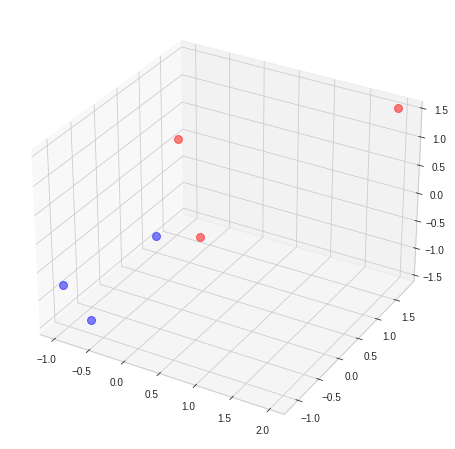

In [4]:

fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection='3d')
plt.rcParams['legend.fontsize'] = 10   
ax.plot(x_r[0,0:int(m/2)], x_r[1,0:int(m/2)], x_r[2,0:int(m/2)], 'o', markersize=8, color='red', alpha=0.5, label='class1')
ax.plot(x_r[0,int(m/2):m], x_r[1,int(m/2):m], x_r[2,int(m/2):m], 'o', markersize=8, color='blue', alpha=0.5, label='class2')
plt.show()


### PCA 

- Paso 3: calculamos la matriz de covarianza
    

In [5]:
cvm=np.cov(x_r)
print (cvm)

[[1.2  0.97 0.94]
 [0.97 1.2  1.1 ]
 [0.94 1.1  1.2 ]]


### PCA

**Paso 4: Calculamos valores y vectores propios de la matriz de covarianza**

- Los vectores propios obtenidos nos indican las direcciones en las que los datos varían más. 
- El vector con el mayor valor propio es el _componente principal_ de la matriz, y muestra la dirección en la que los datos están más dispersos.
- Si ordenamos los vectores por el valor absoluto de su valor propio, obtenemos las dimensiones de mayor variación 

In [6]:
eig_val_cov, eig_vec_cov = np.linalg.eig(cvm)
for i in range(len(eig_val_cov)):
    eigvec_cov = eig_vec_cov[:,i].reshape(1,3).T

# Hacemos un alista de pares (valor, vector) y las ordenamos de mayor a menor
eig_pairs = [(np.abs(eig_val_cov[i]), eig_vec_cov[:,i]) 
             for i in range(len(eig_val_cov))]
eig_pairs.sort()
eig_pairs.reverse()

for i in eig_pairs:
    print(i)


    

(3.2055337366682966, array([0.56, 0.59, 0.58]))
(0.29880117000138945, array([ 0.83, -0.33, -0.46]))
(0.09566509333031278, array([ 0.08, -0.74,  0.67]))


### PCA

**Paso 5: elegimos los componentes principales y generamos una matriz cuyas filas son los vectores propios**

- La matriz de componentes principales $\in \mathbb{R}^{d \times n}$ (siendo $d$ la cantidad de dimensiones con mayor valor propio)


In [7]:
matrix_w = np.vstack((eig_pairs[0][1], eig_pairs[1][1]))
print('Matriz de componentes principales:\n', matrix_w)

Matriz de componentes principales:
 [[ 0.56  0.59  0.58]
 [ 0.83 -0.33 -0.46]]


### PCA 

**Paso 6: generamos el nuevo dataset, d-dimensional**

- Multiplicamos la matriz de componentes por  el dataset original 
- Verificamos: la matriz de componentes principales $\in \mathbb{R}^{d \times n}$, y el dataset  $\in \mathbb{R}^{n \times m}$.  
- El resultado $\in \mathbb{R}^{d \times m}$, por lo que el nuevo dataset tiene en las filas dimensiones y en las columnas las instancias, igual que el original

In [8]:
x_rt = np.dot(matrix_w, x_r)
print (x_rt)

[[ 3.07  0.1   0.63 -1.66 -0.31 -1.83]
 [ 0.34  0.4  -1.05 -0.1   0.1   0.31]]


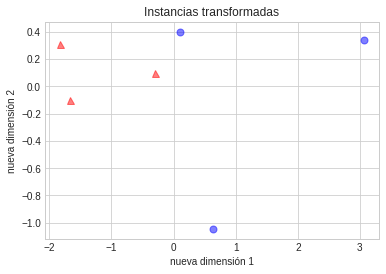

In [9]:
plt.plot(x_rt[0,0:int(m/2)], x_rt[1,0:int(m/2)], 'o', markersize=7, color='blue', alpha=0.5, label='men')
plt.plot(x_rt[0,int(m/2):m], x_rt[1,int(m/2):m], '^', markersize=7, color='red', alpha=0.5, label='women')
plt.xlabel('nueva dimensión 1')
plt.ylabel('nueva dimensión 2')
#plt.legend()
plt.title('Instancias transformadas')

plt.show()

### PCA 

- Ejercicio: ¿no podríamos quedarnos con alguna dimensión menos?
- Ejercicio: ¿cómo recuperamos los datos originales?

### Referencias

- [A tutorial on PCA](http://www.cs.otago.ac.nz/cosc453/student_tutorials/principal_components.pdf)(Lindsay Smiths)

- [PCA Step by step in Python](http://sebastianraschka.com/Articles/2014_pca_step_by_step.html) (Sebastian Raschka)